# Problem 2

In this Jupyter notebook, we visualize how HMMs work. This visualization corresponds to problem 2 in set 6.

Assuming your HMM module is complete and saved at the correct location, you can simply run all cells in the notebook without modification.

In [1]:
import os
import numpy as np
from IPython.display import HTML

from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)

## Visualization of the dataset

We will be using the Constitution as our dataset. First, we visualize the entirety of the Constitution as a wordcloud:

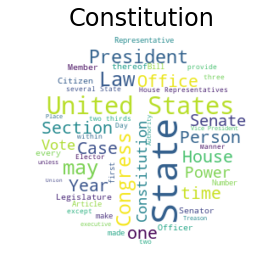

In [2]:
text = open(os.path.join(os.getcwd(), 'data/constitution.txt')).read()
wordcloud = text_to_wordcloud(text, title='Constitution')

## Training an HMM

Now we train an HMM on our dataset. We use 10 hidden states and train over 100 iterations:

In [3]:
obs, obs_map = parse_observations(text)
print(obs_map)

{'we': 0, 'the': 1, 'people': 2, 'of': 3, 'united': 4, 'states': 5, 'in': 6, 'order': 7, 'to': 8, 'form': 9, 'a': 10, 'more': 11, 'perfect': 12, 'union': 13, 'establish': 14, 'justice': 15, 'insure': 16, 'domestic': 17, 'tranquility': 18, 'provide': 19, 'for': 20, 'common': 21, 'defence': 22, 'promote': 23, 'general': 24, 'welfare': 25, 'and': 26, 'secure': 27, 'blessings': 28, 'liberty': 29, 'ourselves': 30, 'our': 31, 'posterity': 32, 'do': 33, 'ordain': 34, 'this': 35, 'constitution': 36, 'america': 37, 'article': 38, 'i': 39, 'section': 40, '1': 41, 'all': 42, 'legislative': 43, 'powers': 44, 'herein': 45, 'granted': 46, 'shall': 47, 'be': 48, 'vested': 49, 'congress': 50, 'which': 51, 'consist': 52, 'senate': 53, 'house': 54, 'representatives': 55, '2': 56, 'composed': 57, 'members': 58, 'chosen': 59, 'every': 60, 'second': 61, 'year': 62, 'by': 63, 'several': 64, 'electors': 65, 'each': 66, 'state': 67, 'have': 68, 'qualifications': 69, 'requisite': 70, 'most': 71, 'numerous': 72

In [ ]:
hmm8 = unsupervised_HMM(obs, 10, 100)

## Part G: Visualization of the sparsities of A and O

We can visualize the sparsities of the A and O matrices by treating the matrix entries as intensity values and showing them as images. What patterns do you notice?

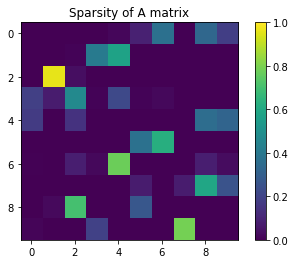

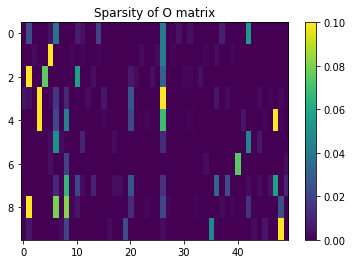

In [4]:
visualize_sparsities(hmm8, O_max_cols=50)

## Generating a sample sentence

As you have already seen, an HMM can be used to generate sample sequences based on the given dataset. Run the cell below to show a sample sentence based on the Constitution.

In [12]:
print('Sample Sentence:\n====================')
print(sample_sentence(hmm8, obs_map, n_words=25))

Sample Sentence:
General house and not be for when or make such states of when or as elected the united president with for each subject and the...


## Part H: Using varying numbers of hidden states

Using different numbers of hidden states can lead to different behaviours in the HMMs. Below, we train several HMMs with 1, 2, 4, and 16 hidden states, respectively. What do you notice about their emissions? How do these emissions compare to the emission above?

In [13]:
hmm1 = unsupervised_HMM(obs, 1, 100)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm1, obs_map, n_words=25))


Sample Sentence:
Regulate or state parts laws on houses third the nine if states be any death of or be any work erazure states on of a...


In [14]:
hmm2 = unsupervised_HMM(obs, 2, 100)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm2, obs_map, n_words=25))


Sample Sentence:
Citizen the to directed compensation six of have of adjournment execute the names treaties congress and representative the respecting vested the have which of of...


In [15]:
hmm4 = unsupervised_HMM(obs, 4, 100)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm4, obs_map, n_words=25))


Sample Sentence:
As united day an partly in try kind appointed like shall so they peace thereof law follows the within a executive in united the section...


In [16]:
hmm16 = unsupervised_HMM(obs, 16, 100)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm16, obs_map, n_words=25))


Sample Sentence:
He both issue at representatives thirds which discharge the choice state otherwise the senate state under blood sealed of guarantee by and to the united...


## Part I: Visualizing the wordcloud of each state

Below, we visualize each state as a wordcloud by sampling a large emission from the state:

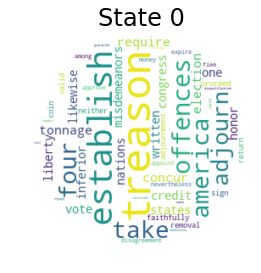

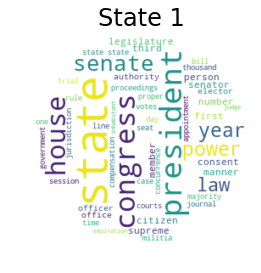

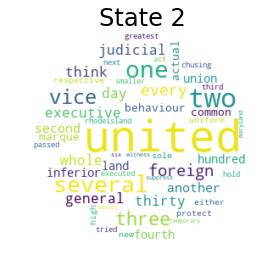

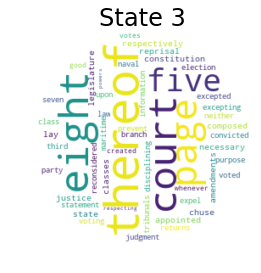

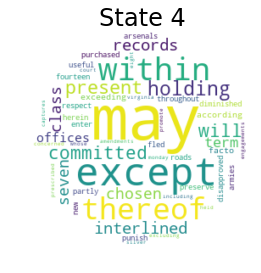

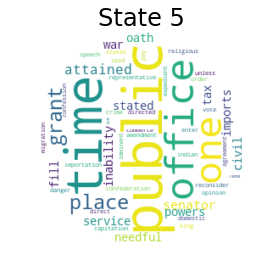

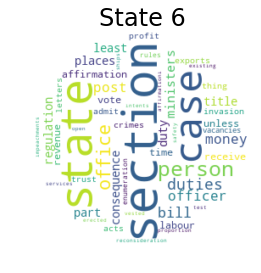

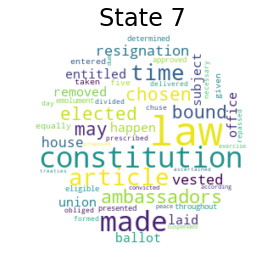

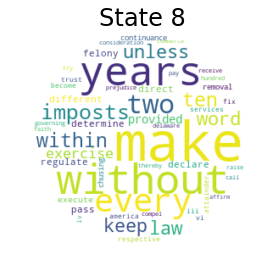

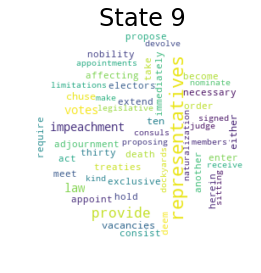

In [17]:
wordclouds = states_to_wordclouds(hmm8, obs_map)

## Visualizing the process of an HMM generating an emission

The visualization below shows how an HMM generates an emission. Each state is shown as a wordcloud on the plot, and transition probabilities between the states are shown as arrows. The darker an arrow, the higher the transition probability.

At every frame, a transition is taken and an observation is emitted from the new state. A red arrow indicates that the transition was just taken. If a transition stays at the same state, it is represented as an arrowhead on top of that state.

Use fullscreen for a better view of the process.

/Users/ywwu/anaconda3/envs/python3_6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "



Animating...


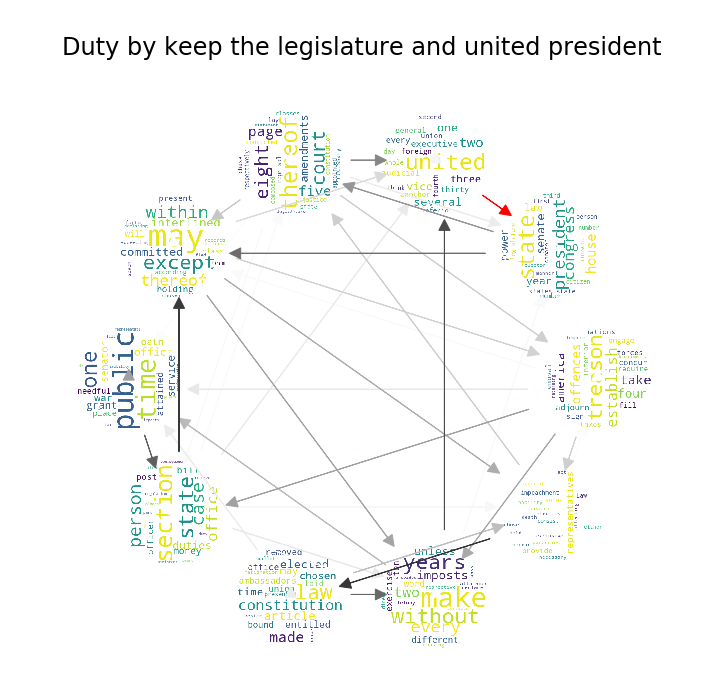

In [18]:
anim = animate_emission(hmm8, obs_map, M=8)
HTML(anim.to_html5_video())